In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

# Bernoulli Distribution $\mathcal{B}(p)$

## Probability Mass Function (PMF)
The PMF of a Bernoulli distributed random variable $ X $ is given by:


$$P(X = k) =
\begin{cases}
p, & \text{if } k = 1 \\
1 - p, & \text{if } k = 0
\end{cases}$$


where $(p)$ is the probability of success.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) =
\begin{cases}
0, & x < 0 \\
1 - p, & 0 \leq x < 1 \\
1, & x \geq 1
\end{cases}
$$

## Quantile Function
The quantile function $Q(u)$, which is the inverse of the CDF, is given by:

$$
Q(u) =
\begin{cases}
0, & 0 \leq u < 1 - p \\
1, & 1 - p \leq u \leq 1
\end{cases}
$$

where  $u \in [0,1] $ is a probability.

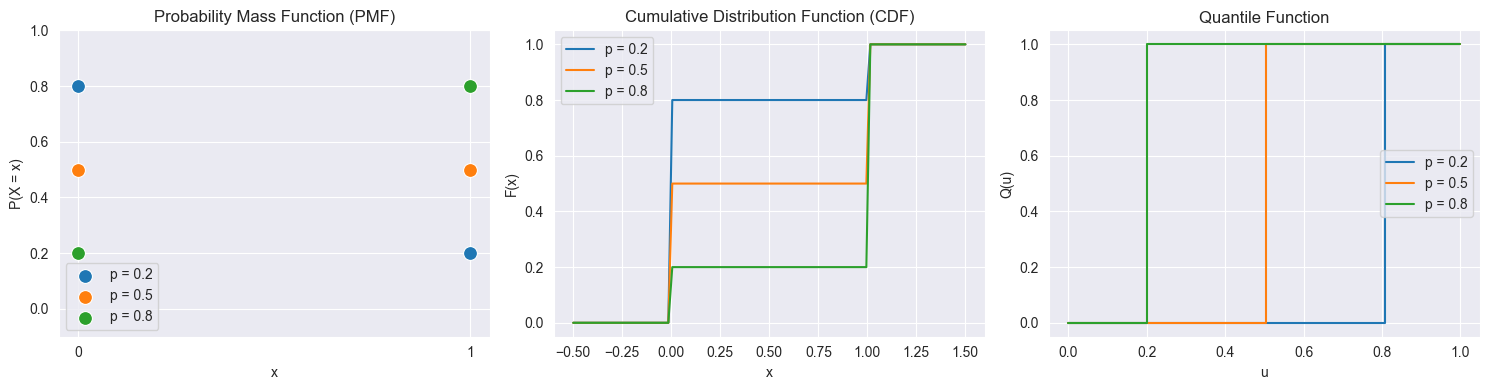

In [25]:
p_values = [1/5, 1/2, 4/5]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

x_values = [0, 1]

# PMF Plot
for p in p_values:
    pmf_values = stats.bernoulli.pmf(x_values, p)
    sns.scatterplot(x=x_values, y=pmf_values, ax=axes[0], label=f'p = {p}', s=100)
axes[0].set_title("Probability Mass Function (PMF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X = x)")
axes[0].set_xticks([0, 1])
axes[0].set_ylim(-0.1, 1)
axes[0].legend()

# CDF Plot
x_cdf = np.linspace(-0.5, 1.5, 100)
for p in p_values:
    cdf_values = stats.bernoulli.cdf(x_cdf, p)
    axes[1].plot(x_cdf, cdf_values, label=f'p = {p}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for p in p_values:
    quantile_values = stats.bernoulli.ppf(u_values, p)
    axes[2].step(u_values, quantile_values, where='post', label=f'p = {p}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

# Binomial Distribution $\mathcal{B}(n, p)$

## Probability Mass Function (PMF)
The PMF of a Binomial distributed random variable $X$ is given by:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad k = 0, 1, 2, \dots, n
$$

where:
- $n$ is the number of trials,
- $p$ is the probability of success in each trial,
- $k$ is the number of successes in $n$ trials.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) = \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1 - p)^{n - k}
$$

where $ \lfloor x \rfloor $ is the greatest integer less than or equal to $x$, and $x$ is a real number.

## Quantile Function
The quantile function $Q(u)$, which is the inverse of the CDF, is defined as:

$$
Q(u) = \min \left\{ k \in \{0, 1, 2, \dots, n\} \mid F(k) \geq u \right\}
$$

where $u \in [0,1]$ is a probability.

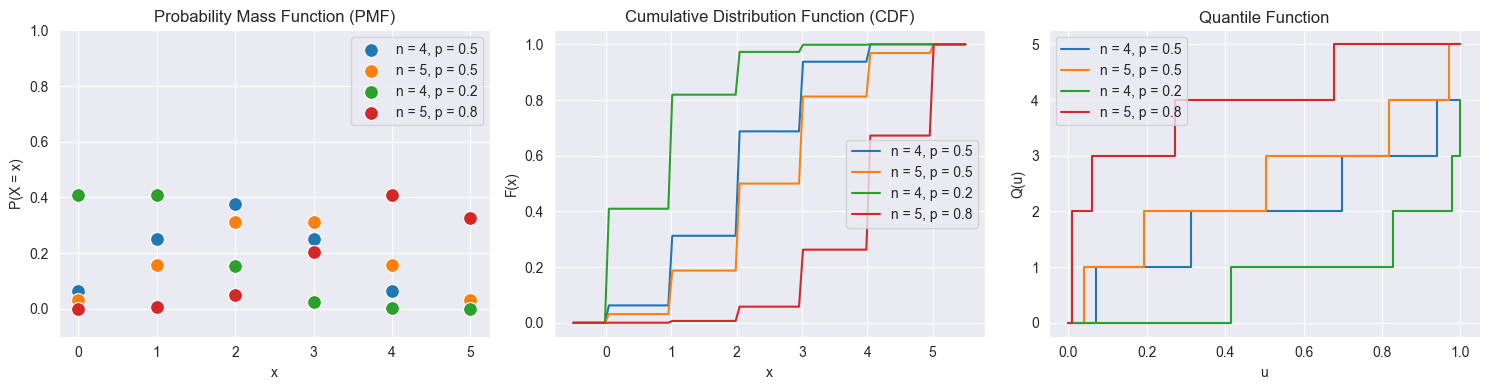

In [24]:
params = [(4, 1/2), (5, 1/2), (4, 1/5), (5, 4/5)]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PMF Plot
x_values = np.arange(0, 6)  # Possible values for a binomial distribution (max n=5)
for n, p in params:
    pmf_values = stats.binom.pmf(x_values, n, p)
    sns.scatterplot(x=x_values, y=pmf_values, ax=axes[0], label=f'n = {n}, p = {p}', s=100)
axes[0].set_title("Probability Mass Function (PMF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X = x)")
axes[0].set_xticks(x_values)
axes[0].set_ylim(-0.1, 1)
axes[0].legend()

# CDF Plot
x_cdf = np.linspace(-0.5, 5.5, 100)
for n, p in params:
    cdf_values = stats.binom.cdf(x_cdf, n, p)
    axes[1].plot(x_cdf, cdf_values, label=f'n = {n}, p = {p}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for n, p in params:
    quantile_values = stats.binom.ppf(u_values, n, p)
    axes[2].step(u_values, quantile_values, where='post', label=f'n = {n}, p = {p}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

# Poisson Distribution $\mathcal{P}(\lambda)$

## Probability Mass Function (PMF)
The PMF of a Poisson distributed random variable $X$ is given by:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

where:
- $\lambda$ is the rate (mean) of occurrence,
- $k$ is the number of events occurring in a fixed interval.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) = \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k e^{-\lambda}}{k!}
$$

where $ \lfloor x \rfloor $ is the greatest integer less than or equal to $x$, and $x$ is a real number.

## Quantile Function
The quantile function $Q(u)$, which is the inverse of the CDF, is defined as:

$$
Q(u) = \min \left\{ k \in \{0, 1, 2, \dots\} \mid F(k) \geq u \right\}
$$

where $u \in [0,1]$ is a probability.


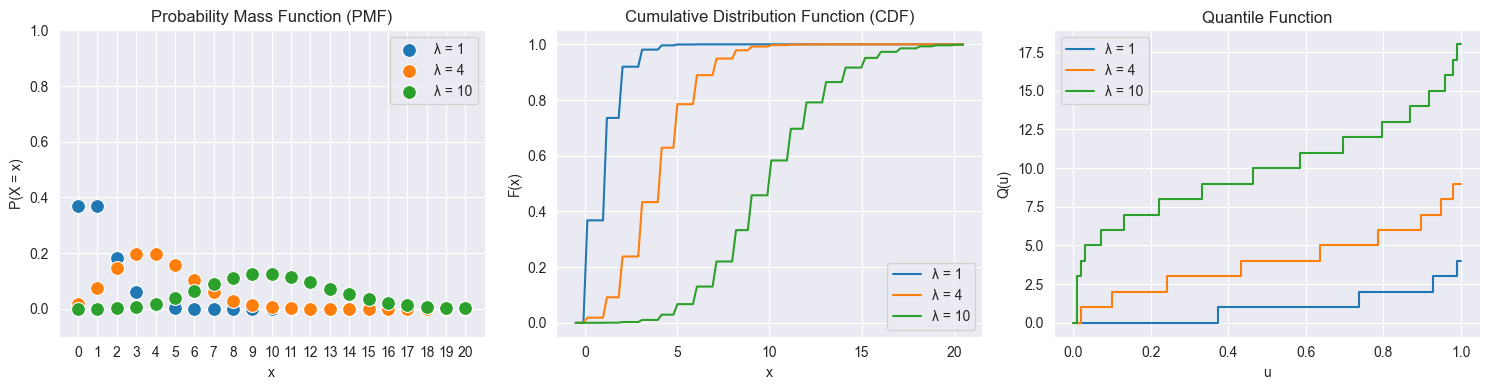

In [6]:
lambdas = [1, 4, 10]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PMF Plot
x_values = np.arange(0, 21)  # Poisson distribution possible values
for lam in lambdas:
    pmf_values = stats.poisson.pmf(x_values, lam)
    sns.scatterplot(x=x_values, y=pmf_values, ax=axes[0], label=f'λ = {lam}', s=100)
axes[0].set_title("Probability Mass Function (PMF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X = x)")
axes[0].set_xticks(x_values)
axes[0].set_ylim(-0.1, 1)
axes[0].legend()

# CDF Plot
x_cdf = np.linspace(-0.5, 20.5, 100)
for lam in lambdas:
    cdf_values = stats.poisson.cdf(x_cdf, lam)
    axes[1].plot(x_cdf, cdf_values, label=f'λ = {lam}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for lam in lambdas:
    quantile_values = stats.poisson.ppf(u_values, lam)
    axes[2].step(u_values, quantile_values, where='post', label=f'λ = {lam}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

# Geometric Distribution $\mathcal{G}(p)$

## Probability Mass Function (PMF)
The PMF of a Geometric distributed random variable $ X $ is given by:

$$
P(X = k) = (1 - p)^{k-1} p, \quad k = 1, 2, 3, \dots
$$

where:
- $p$ is the probability of success on a single trial,
- $k$ is the number of trials until the first success.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) = 1 - (1 - p)^x, \quad x = 1, 2, 3, \dots
$$

where $x$ is a positive integer, and $p$ is the probability of success.

## Quantile Function
The quantile function $ Q(u) $, which is the inverse of the CDF, is defined as:

$$
Q(u) = \left\lceil \frac{\ln(1 - u)}{\ln(1 - p)} \right\rceil
$$

where $ u \in [0, 1] $ is a probability, and $ \lceil \cdot \rceil $ denotes the ceiling function (rounding up to the nearest integer).


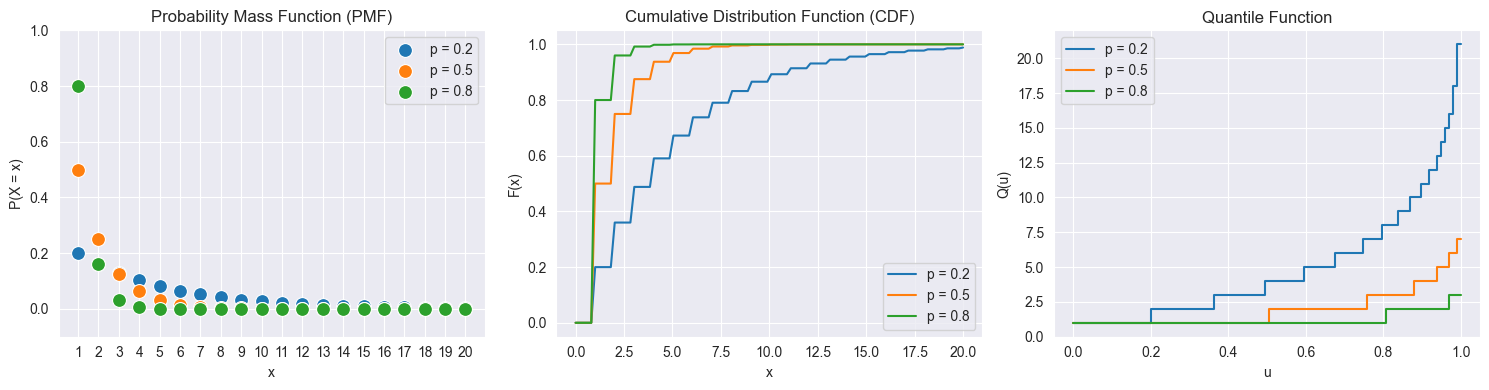

In [7]:
p_values = [1/5, 1/2, 4/5]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PMF Plot
x_values = np.arange(1, 21)  # Geometric distribution possible values (starting from 1)
for p in p_values:
    pmf_values = stats.geom.pmf(x_values, p)
    sns.scatterplot(x=x_values, y=pmf_values, ax=axes[0], label=f'p = {p}', s=100)
axes[0].set_title("Probability Mass Function (PMF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X = x)")
axes[0].set_xticks(x_values)
axes[0].set_ylim(-0.1, 1)
axes[0].legend()

# CDF Plot
x_cdf = np.linspace(0, 20, 100)
for p in p_values:
    cdf_values = stats.geom.cdf(x_cdf, p)
    axes[1].plot(x_cdf, cdf_values, label=f'p = {p}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for p in p_values:
    quantile_values = stats.geom.ppf(u_values, p)
    axes[2].step(u_values, quantile_values, where='post', label=f'p = {p}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


# Uniform Distribution $\mathcal{U}(a, b)$

## Probability Density Function (PDF)
The PDF of a Uniformly distributed random variable $ X $ is given by:

$$
f_X(x) =
\begin{cases}
\frac{1}{b - a}, & a \leq x \leq b \\
0, & \text{otherwise}
\end{cases}
$$

where:
- $a$ and $b$ are the lower and upper bounds of the distribution, respectively,
- $x$ is a continuous random variable.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) =
\begin{cases}
0, & x < a \\
\frac{x - a}{b - a}, & a \leq x \leq b \\
1, & x > b
\end{cases}
$$

where $x$ is a continuous random variable, and $a$ and $b$ are the lower and upper bounds of the distribution.

## Quantile Function
The quantile function $ Q(u) $, which is the inverse of the CDF, is defined as:

$$
Q(u) = a + u(b - a), \quad u \in [0, 1]
$$

where $u$ is a probability.



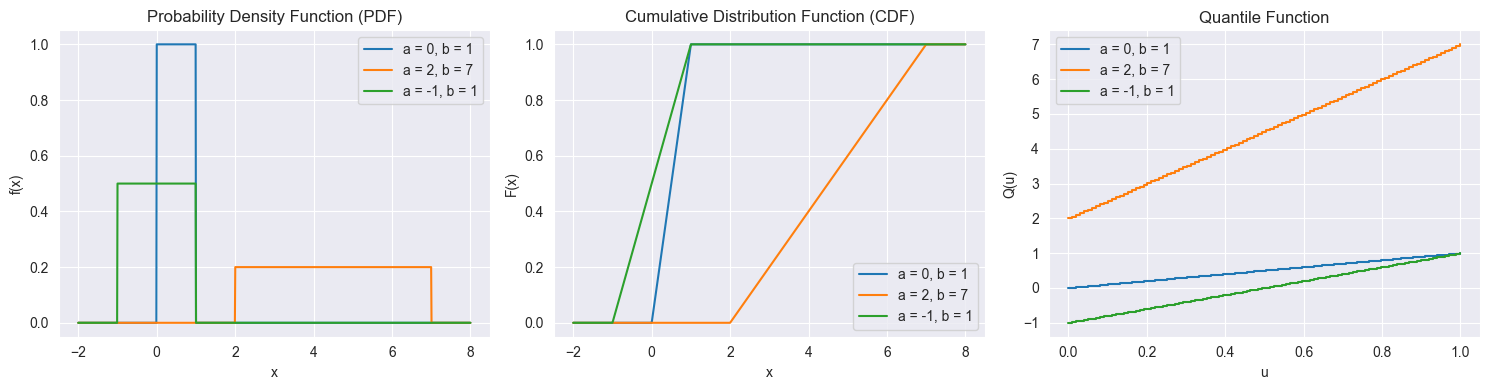

In [10]:
params = [(0, 1), (2, 7), (-1, 1)]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PDF Plot (For Uniform distribution)
x_values = np.linspace(-2, 8, 1000)  # Uniform distribution possible values
for a, b in params:
    pdf_values = stats.uniform.pdf(x_values, a, b - a)
    axes[0].plot(x_values, pdf_values, label=f'a = {a}, b = {b}')
axes[0].set_title("Probability Density Function (PDF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()

# CDF Plot
for a, b in params:
    cdf_values = stats.uniform.cdf(x_values, a, b - a)
    axes[1].plot(x_values, cdf_values, label=f'a = {a}, b = {b}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for a, b in params:
    quantile_values = stats.uniform.ppf(u_values, a, b - a)
    axes[2].step(u_values, quantile_values, where='post', label=f'a = {a}, b = {b}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


# Exponential Distribution $\mathcal{E}(\lambda)$

## Probability Density Function (PDF)
The PDF of an exponentially distributed random variable $ X $ with rate parameter $ \lambda $ is given by:

$$
f_X(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

where:
- $ \lambda $ is the rate parameter (the reciprocal of the mean, $ \lambda = \frac{1}{\mu} $),
- $ x $ is a continuous random variable representing the time until the first event occurs in a Poisson process.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) =
\begin{cases}
0, & x < 0 \\
1 - e^{-\lambda x}, & x \geq 0
\end{cases}
$$

where $ x $ is a continuous random variable, and $ \lambda $ is the rate parameter.

## Quantile Function
The quantile function $ Q(u) $, which is the inverse of the CDF, is defined as:

$$
Q(u) = -\frac{\ln(1 - u)}{\lambda}, \quad u \in [0, 1]
$$

where:
- $ u $ is a probability,
- $ \lambda $ is the rate parameter.


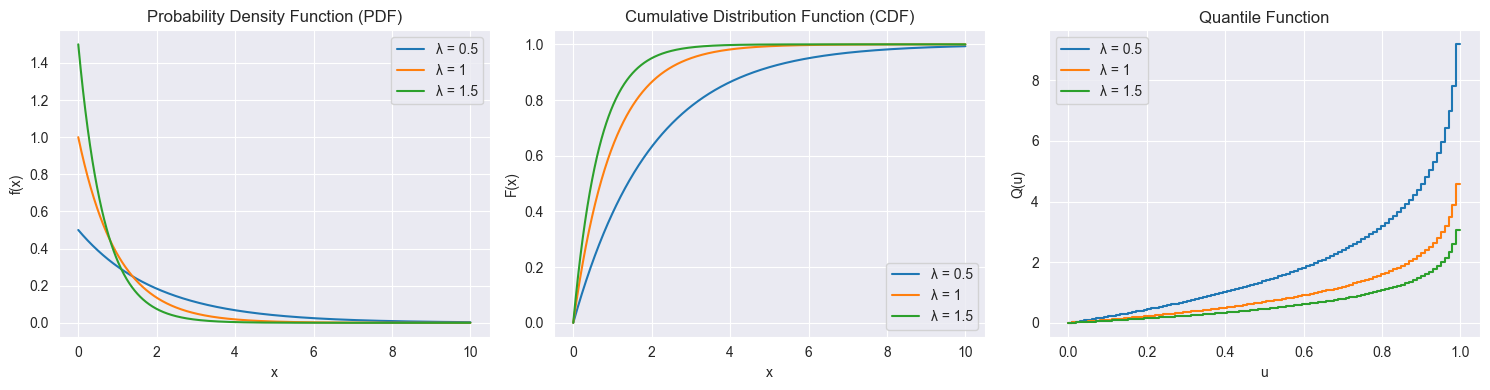

In [12]:
lambdas = [1/2, 1, 3/2]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PDF Plot (For Exponential distribution)
x_values = np.linspace(0, 10, 1000)  # Exponential distribution possible values
for lam in lambdas:
    pdf_values = stats.expon.pdf(x_values, scale=1/lam)
    axes[0].plot(x_values, pdf_values, label=f'λ = {lam}')
axes[0].set_title("Probability Density Function (PDF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()

# CDF Plot
for lam in lambdas:
    cdf_values = stats.expon.cdf(x_values, scale=1/lam)
    axes[1].plot(x_values, cdf_values, label=f'λ = {lam}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for lam in lambdas:
    quantile_values = stats.expon.ppf(u_values, scale=1/lam)
    axes[2].step(u_values, quantile_values, where='post', label=f'λ = {lam}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

# Gamma Distribution $\mathcal{G}(\alpha, \lambda)$

## Probability Density Function (PDF)
The PDF of a Gamma distributed random variable $X$ with shape parameter $\alpha$ and rate parameter $\lambda$ is given by:

$$
f_X(x) =
\begin{cases}
\frac{\lambda^\alpha x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

where:
- $\alpha$ is the shape parameter,
- $\lambda$ is the rate parameter (the reciprocal of the mean, $\lambda = \frac{1}{\mu}$),
- $x$ is a continuous random variable representing the time until the $\alpha$-th event occurs in a Poisson process,
- $\Gamma(\alpha)$ is the Gamma function.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) = \int_0^x \frac{\lambda^\alpha t^{\alpha-1} e^{-\lambda t}}{\Gamma(\alpha)} \, dt
$$

for $x \geq 0$, and $F(x) = 0$ for $x < 0$.

## Quantile Function
The quantile function $Q(u)$, which is the inverse of the CDF, can be expressed numerically as:

$$
Q(u) = \text{Gamma}^{-1}(u; \alpha, \lambda)
$$

where:
- $u$ is a probability,
- $\text{Gamma}^{-1}$ denotes the inverse of the CDF (which is generally computed numerically).


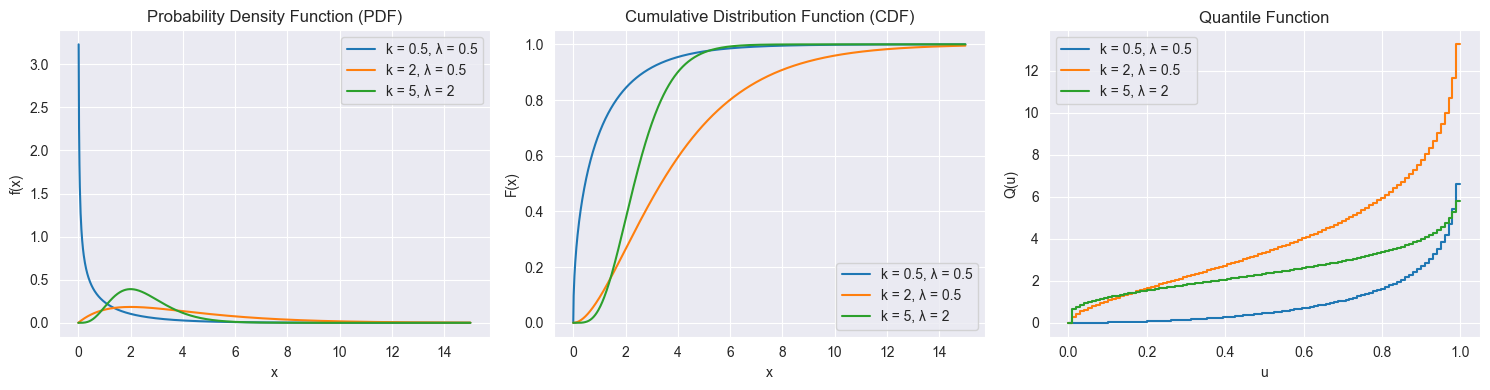

In [13]:
params = [(1/2, 1/2), (2, 1/2), (5, 2)]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PDF Plot (For Gamma distribution)
x_values = np.linspace(0, 15, 1000)  # Gamma distribution possible values
for k, lam in params:
    pdf_values = stats.gamma.pdf(x_values, a=k, scale=1/lam)
    axes[0].plot(x_values, pdf_values, label=f'k = {k}, λ = {lam}')
axes[0].set_title("Probability Density Function (PDF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()

# CDF Plot
for k, lam in params:
    cdf_values = stats.gamma.cdf(x_values, a=k, scale=1/lam)
    axes[1].plot(x_values, cdf_values, label=f'k = {k}, λ = {lam}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for k, lam in params:
    quantile_values = stats.gamma.ppf(u_values, a=k, scale=1/lam)
    axes[2].step(u_values, quantile_values, where='post', label=f'k = {k}, λ = {lam}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

# Normal Distribution $\mathcal{N}(\mu, \sigma^2)$

## Probability Density Function (PDF)
The PDF of a normally distributed random variable $ X $ with mean $ \mu $ and variance $ \sigma^2 $ is given by:

$$
f_X(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

where:
- $ \mu $ is the mean (center) of the distribution,
- $ \sigma $ is the standard deviation (spread) of the distribution,
- $ x $ is a continuous random variable.

## Cumulative Distribution Function (CDF)
The CDF is defined as:

$$
F(x) = P(X \leq x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

where $ \text{erf}(z) $ is the error function, defined as:

$$
\text{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-t^2} dt
$$

## Quantile Function
The quantile function $ Q(u) $, which is the inverse of the CDF, is defined as:

$$
Q(u) = \mu + \sigma \sqrt{2} \cdot \text{erf}^{-1}(2u - 1)
$$

where:
- $ u \in [0, 1] $ is a probability,
- $ \mu $ is the mean,
- $ \sigma $ is the standard deviation.


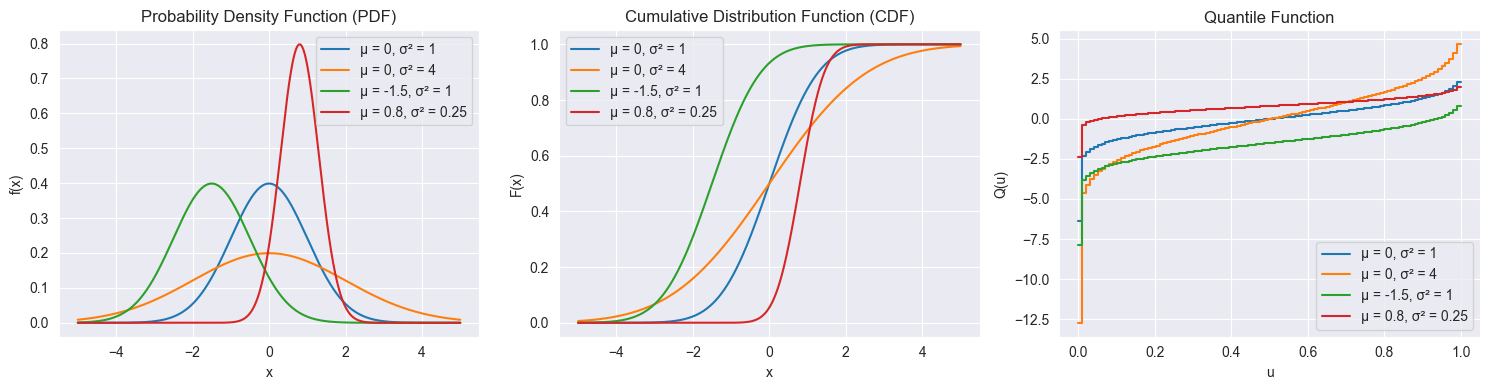

In [14]:
params = [(0, 1), (0, 4), (-3/2, 1), (4/5, 1/4)]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PDF Plot (For Normal distribution)
x_values = np.linspace(-5, 5, 1000)  # Normal distribution possible values
for mu, sigma2 in params:
    sigma = np.sqrt(sigma2)  # Calculate standard deviation
    pdf_values = stats.norm.pdf(x_values, mu, sigma)
    axes[0].plot(x_values, pdf_values, label=f'μ = {mu}, σ² = {sigma2}')
axes[0].set_title("Probability Density Function (PDF)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()

# CDF Plot
for mu, sigma2 in params:
    sigma = np.sqrt(sigma2)  # Calculate standard deviation
    cdf_values = stats.norm.cdf(x_values, mu, sigma)
    axes[1].plot(x_values, cdf_values, label=f'μ = {mu}, σ² = {sigma2}')

axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(x)")
axes[1].legend()

# Quantile Function Plot
u_values = np.linspace(1E-10, 1, 100)
for mu, sigma2 in params:
    sigma = np.sqrt(sigma2)  # Calculate standard deviation
    quantile_values = stats.norm.ppf(u_values, mu, sigma)
    axes[2].step(u_values, quantile_values, where='post', label=f'μ = {mu}, σ² = {sigma2}')

axes[2].set_title("Quantile Function")
axes[2].set_xlabel("u")
axes[2].set_ylabel("Q(u)")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()